# 경로 설정 및 import 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/MyDrive/015GithubRepos/wanted_pre_onboarding/기업과제')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [3]:
df = pd.read_csv('pretest_data.csv')

In [4]:
df.head(2)

,video_id,channel_id,published_date,category_name,duration,tags,description,on_trending_date,off_trending_date,on_rank,...,on_dislikes,off_dislikes,on_comments,off_comments,on_channel_subscribers,off_channel_subscribers,on_channel_total_views,off_channel_total_views,on_channel_total_videos,off_channel_total_videos
0,V-0db,CH49ta0,2021-07-01,Entertainment,PT8M20S,SiriusXM|Sirius XM|Sirius|SXM|BIGHIT|빅히트|방탄소년단...,BTS performs their hit songs ‘Dynamite’ and ‘B...,2021-07-03,2021-07-04,13,...,792,1014,10373,10720,1080000,1080000,685992413,687485021,5947,5950
1,V-1XL,CHZVD--,2021-06-24,Entertainment,PT9M17S,치킨불냉면|치킨|불냉면|냉면,영상에 나오는 캐릭터의 이름은 파도비 입니다. 고양이가 아니라 파란 도깨비입니다. ...,2021-06-26,2021-06-27,28,...,121,154,1083,1173,627000,628000,75327083,75685030,70,70


In [5]:
df.shape

(2644, 25)

# Q1

In [6]:
print(df['category_name'].unique())
cat_num = len(df['category_name'].unique())
print(f'카테고리 개수 : {cat_num}')

['Entertainment' 'Sports' 'Music' 'People & Blogs' 'Science & Technology'
 'Education' 'Howto & Style' 'News & Politics' 'Gaming' 'Comedy'
 'Pets & Animals' 'Travel & Events' 'Film & Animation' 'Autos & Vehicles'
 'Nonprofits & Activism']
카테고리 개수 : 15


In [7]:
df_gb_category = df.groupby(['category_name']).size()
for c, n in sorted(df_gb_category.items(), key=lambda x: x[1], reverse=True):
    print(f'{c:25} : {n}')

Entertainment             : 954
People & Blogs            : 411
Music                     : 234
Sports                    : 222
Comedy                    : 167
News & Politics           : 162
Howto & Style             : 119
Gaming                    : 80
Film & Animation          : 74
Education                 : 65
Pets & Animals            : 65
Science & Technology      : 36
Autos & Vehicles          : 31
Travel & Events           : 23
Nonprofits & Activism     : 1


In [8]:
df_gb_category = df_gb_category.sort_values(ascending=False)

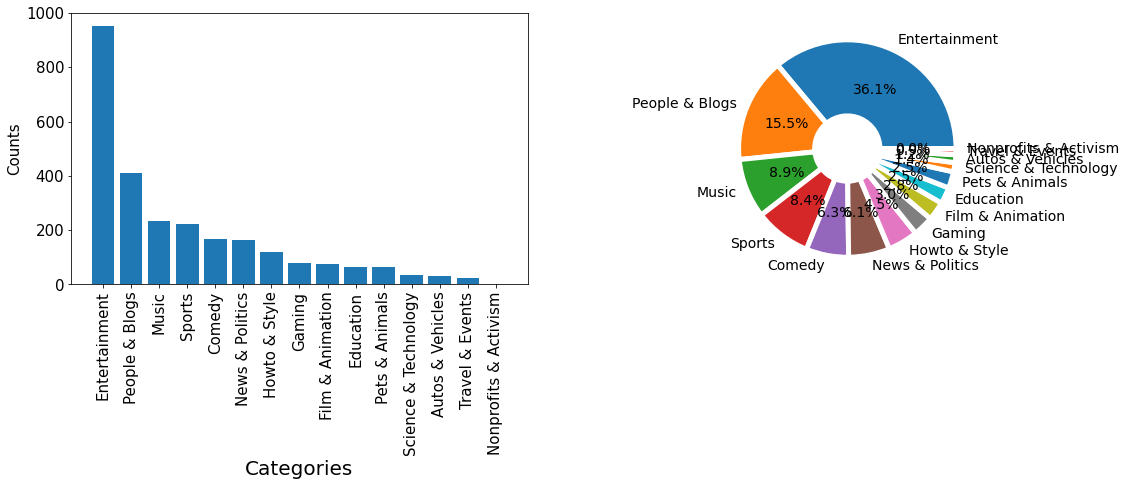

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(18, 5))
ax[0].bar(df_gb_category.index, df_gb_category)
ax[0].set_xlabel('Categories', fontsize=20)
ax[0].set_ylabel('Counts', fontsize=15)
ax[0].tick_params(axis='both', labelsize=15, )
ax[0].tick_params(axis='x', rotation=90)
# ax[0].set_xticks(rotation=60, fontsize=15)
# ax[0].set_yticks(fontsize=15)

wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
ax[1].pie(df_gb_category, labels=df_gb_category.index, wedgeprops=wedgeprops, autopct='%.1f%%', textprops={'fontsize': 14})

plt.show()

가장 많은 카테고리는 Entertainment이며, 그 다음으로는 People & Blogs > Music > Sports 순으로 차지하고 있다.

In [10]:
df['on_trending_date_dt'] = df['on_trending_date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
df['on_trending_date_m'] = df['on_trending_date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d').month)
df['on_trending_date_w'] = df['on_trending_date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d').isocalendar()[1])

In [11]:
print(f"{min(df['on_trending_date_dt'])}")
print(f"{max(df['on_trending_date_dt'])}")

2021-03-27 00:00:00
2021-07-31 00:00:00


데이터는 2021년 3월 27일부터 2021년 7월 31일까지 수집되었음.

<BarContainer object of 5 artists>

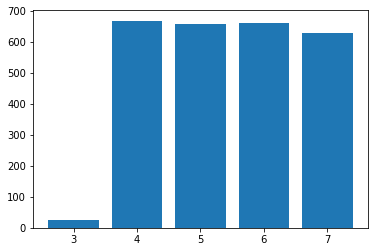

In [12]:
gb_by_m = df.groupby(['on_trending_date_m']).size()
plt.bar(gb_by_m.index, gb_by_m)

월별 수집된 양 : 3월은 27일부터 시작해서 별로 없고, 4월부터 7월까지는 서로 비슷한 양이 수집됨

## ◦ 전체기간 카테고리->채널->비디오 개수

In [13]:
a = df.groupby(['category_name', 'channel_id']).count()['video_id']
a

category_name     channel_id
Autos & Vehicles  CH-IBt8       1
                  CH2xkO7       2
                  CH5f97D       2
                  CHDpnvN       2
                  CHH5U89       2
                               ..
Travel & Events   CHPDdt9       2
                  CHPll9Z       2
                  CHa0aTy       2
                  CHlRNDV       7
                  CHsLoTw       1
Name: video_id, Length: 970, dtype: int64

In [14]:
df_gb_category = df.groupby(['category_name']).size()
df_gb_category = df_gb_category.sort_values(ascending=False)
unique_cats_asc = list(df_gb_category.index)  # 많은 순 카테고리 이름
unique_cats_asc

['Entertainment',
 'People & Blogs',
 'Music',
 'Sports',
 'Comedy',
 'News & Politics',
 'Howto & Style',
 'Gaming',
 'Film & Animation',
 'Education',
 'Pets & Animals',
 'Science & Technology',
 'Autos & Vehicles',
 'Travel & Events',
 'Nonprofits & Activism']

Text(0.5, 0.98, 'Top 10 channels by Categories (entire date)')

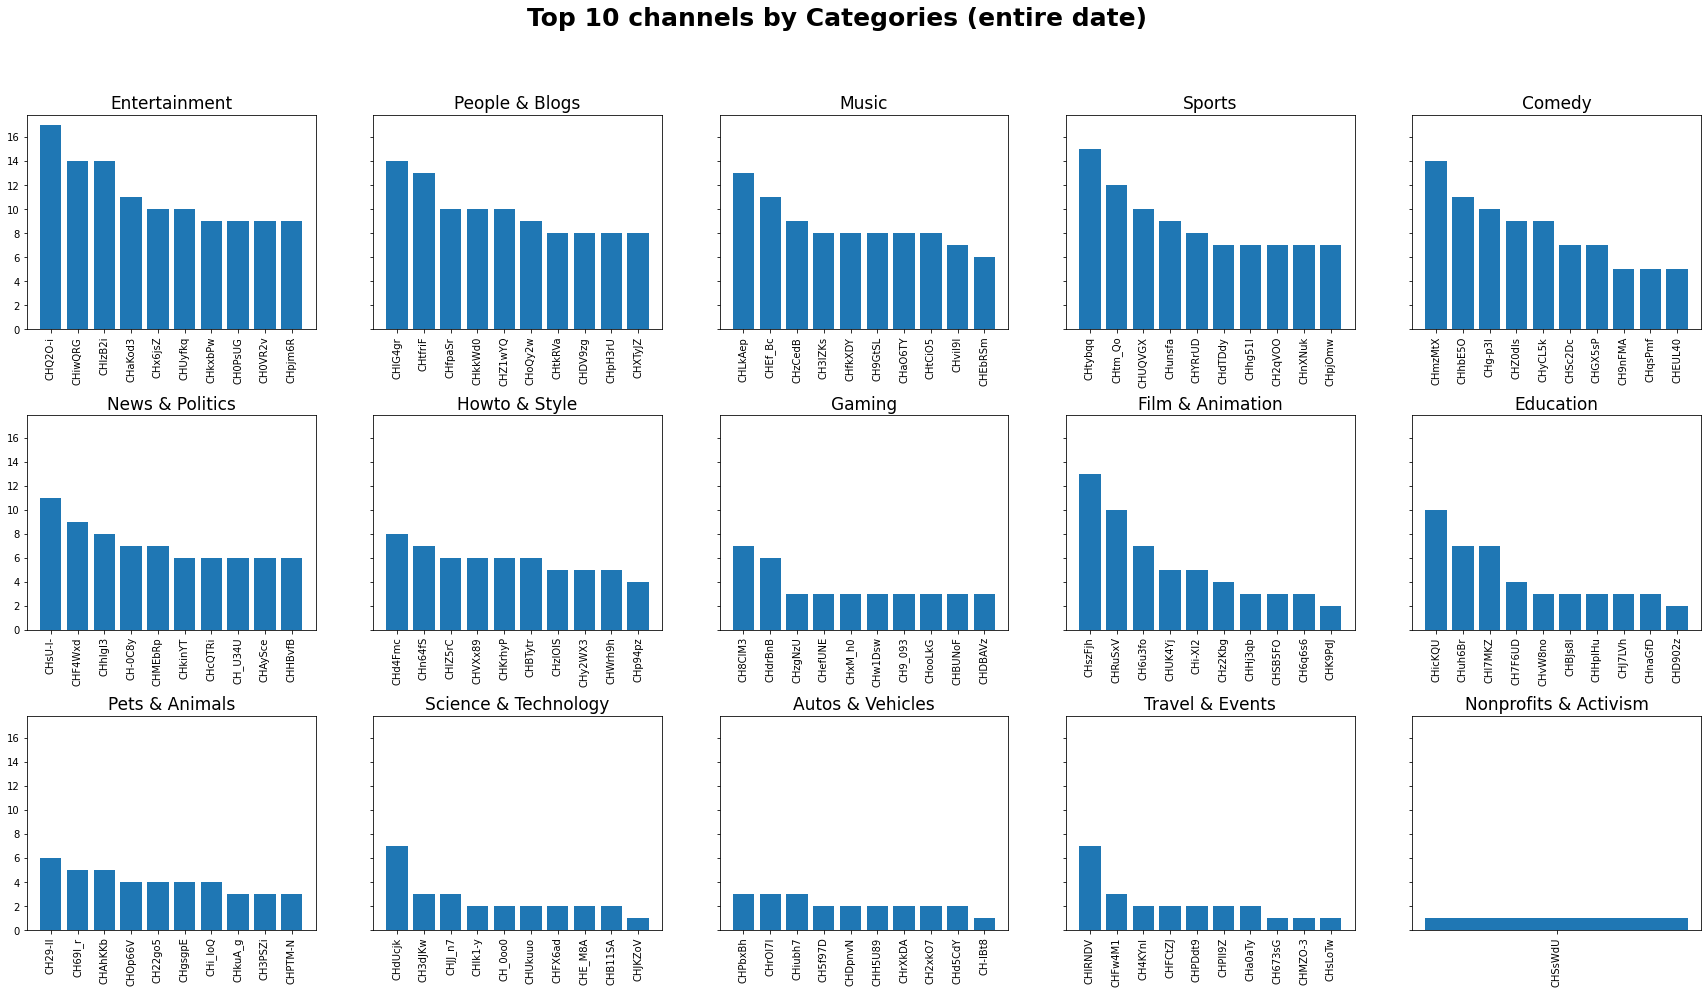

In [15]:
ncol=5
fig, ax = plt.subplots(nrows=int(cat_num/ncol), ncols=ncol, figsize=(30, 15), sharey=True)
plt.subplots_adjust(hspace=0.4)

for i, cat in enumerate(unique_cats_asc):
    temp = a[cat]
    temp_sorted = temp.sort_values(ascending=False)
    axidx_r, axidx_c = i // ncol, i % ncol
    ax[axidx_r, axidx_c].bar(temp_sorted[:10].index, temp_sorted[:10])
    ax[axidx_r, axidx_c].tick_params(axis='x', rotation=90)
    ax[axidx_r, axidx_c].set_title(cat, fontsize=17)

fig.suptitle('Top 10 channels by Categories (entire date)',fontweight ="bold", fontsize=25)

- 전체 기간 중 가장 많은 비디오를 인기탭에 올린 채널은 Entertainment의 'CHQ2O-i'로, 17개의 동영상을 올렸다.
- 인기 있는 상위 5개의 카테고리인 Entertainment, Peoplt & Blogs, Music, Sports, Comedy 카테고리 내에서 약 10개 이상의 동영상을 올리면 해당 카테고리 내에서는 가장 인기있는 채널이라고 할 수 있다.

## ◦ 월별 카테고리->채널->비디오 개수

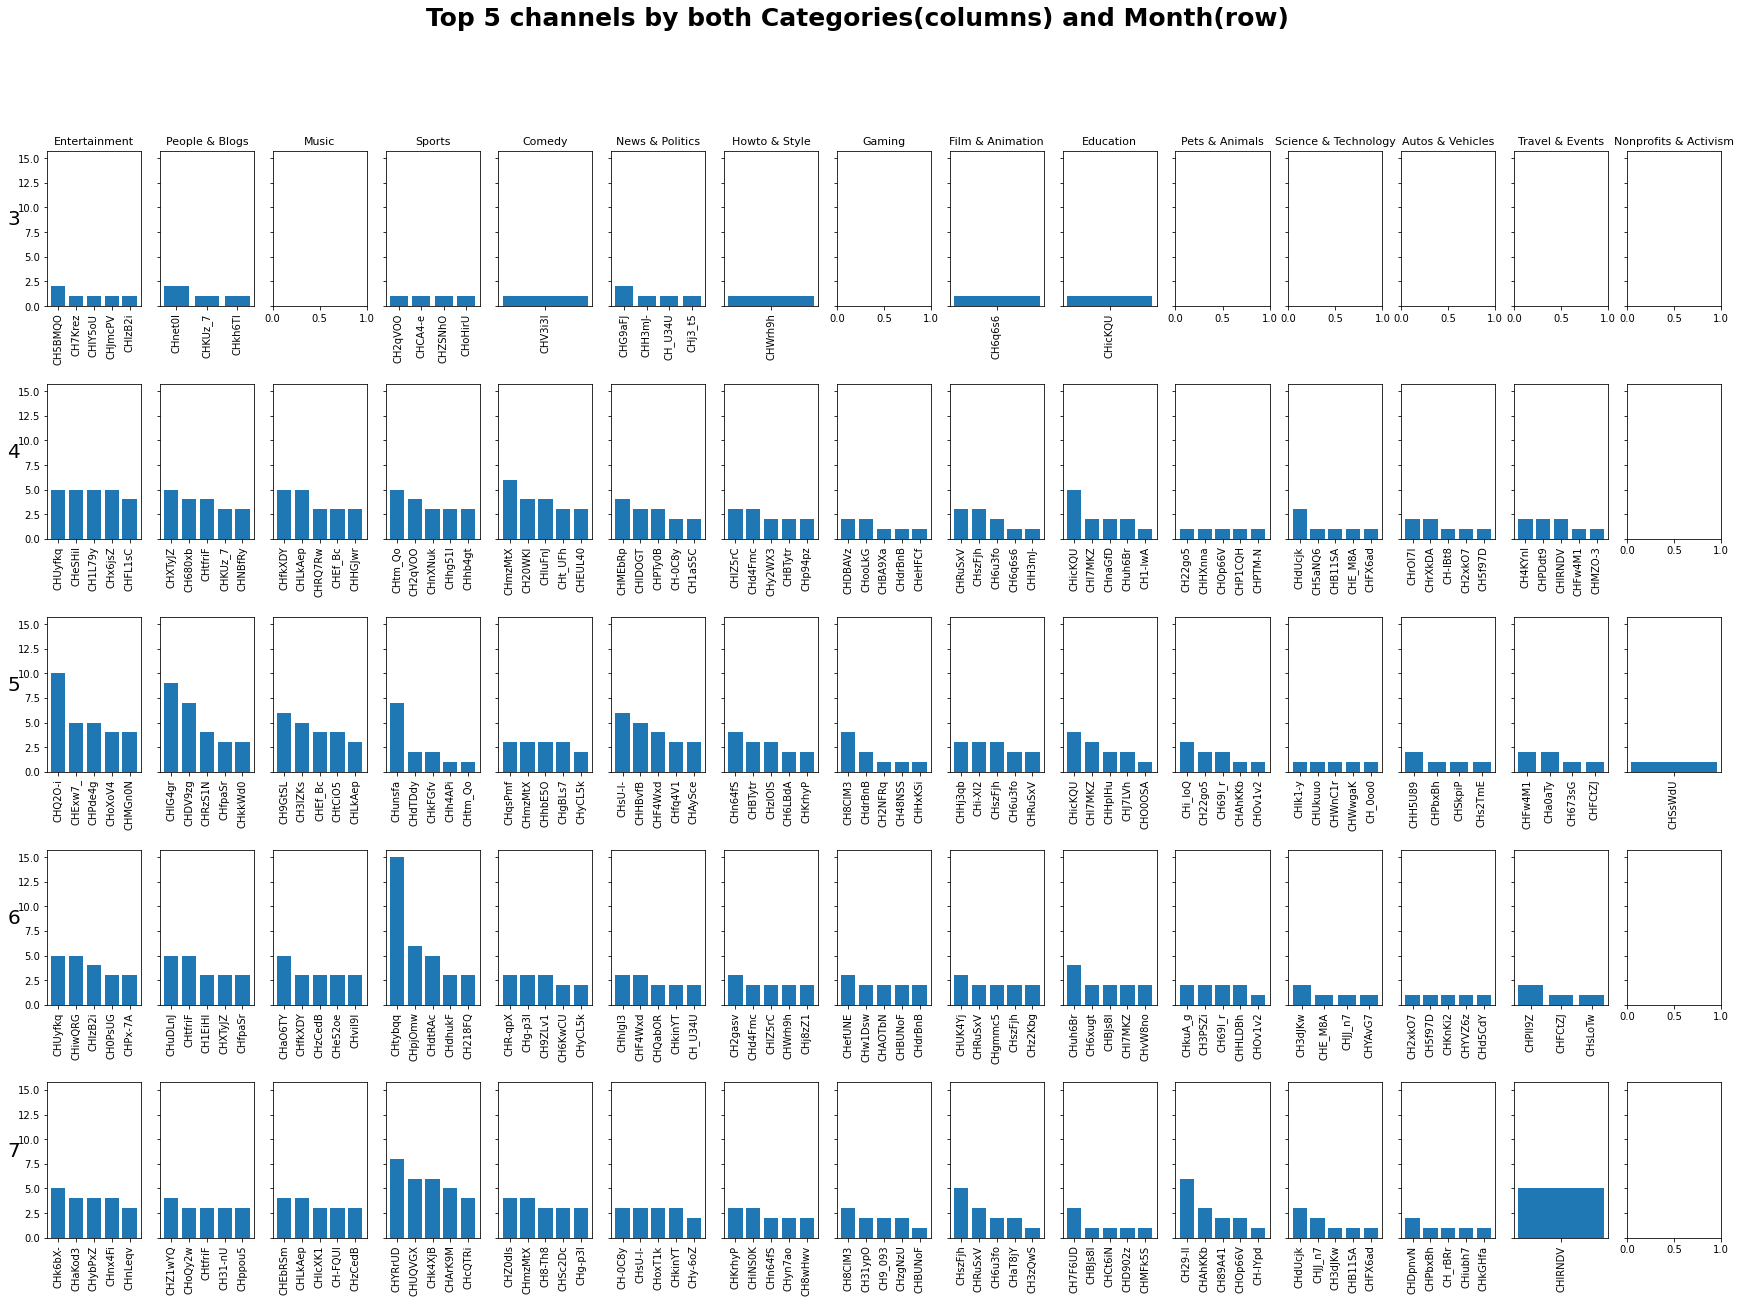

In [16]:
months = df['on_trending_date_m'].unique()
months = sorted(months)

ncol=cat_num
fig, axes = plt.subplots(nrows=len(months), ncols=ncol, figsize=(30, 20), sharey=True)
plt.subplots_adjust(hspace=0.5)

for r, month in enumerate(months):

    df_m = df[df['on_trending_date_m'] == month]
    b = df_m.groupby(['category_name', 'channel_id']).count()['video_id']

    for i, cat in enumerate(unique_cats_asc):
        try:
            temp = b[cat]
        except KeyError:
            continue

        temp_sorted = temp.sort_values(ascending=False)
        axes[r, i].bar(temp_sorted[:5].index, temp_sorted[:5])
        axes[r, i].tick_params(axis='x', rotation=90)



fig.suptitle('Top 5 channels by both Categories(columns) and Month(row)',fontweight ="bold", fontsize=25)
for ax, col in zip(axes[0], unique_cats_asc):
    ax.set_title(col, fontsize=11)
for ax, row in zip(axes[:,0], months):
    ax.set_ylabel(row, rotation=0, fontsize=20)

- 각 월별, 카테고리별로 상위 5개의 채널을 볼 수 있음
- 3월 : 수집 기간이 짧아서 가장 많은 채널은 2개임
- 4월 : 가장 많은 채널은 7개를 기록한 Comedy의 'CHmzMtX'채널이며, 이 외에 5개를 기록한 채널들이 각자의 카테고리에서 최고 값을 달성함
- 5월 : 3~4개의 카테고리가 강세를 보임. Entertainment 최고 값 10, People & Blogs 최고값 8개, Sports 최고값 7개, News&Topics 6개.
- 6월 : Sports 카테고리의 'CHtybqq' 채널이 15개를 기록하여 압도적으로 높음. 2020도쿄올림픽과 관련된 채널일 것으로 추정됨.
-7월 : 이전 달에 이어 Sports 카테고리가 다수 차지함.

## ◦ 월별 TOP10 채널 (분류 기준은 비디오 개수)

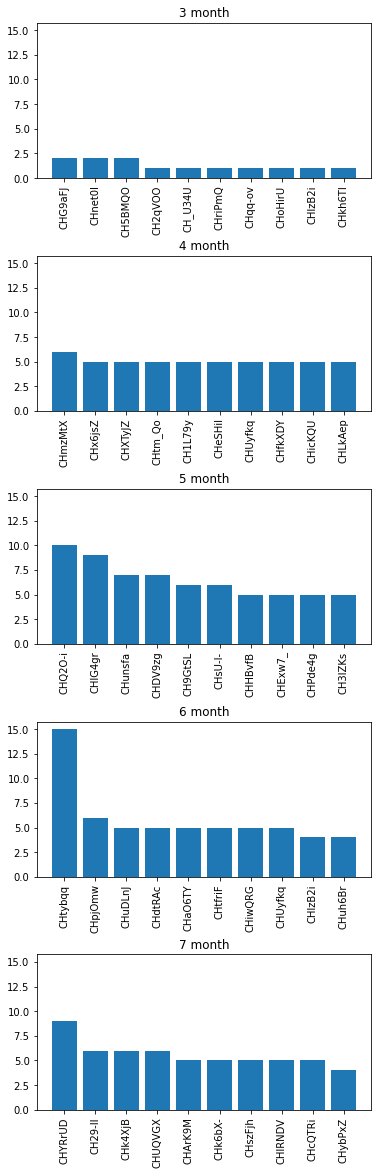

In [127]:
c = df.groupby(['on_trending_date_m', 'channel_id']).count()['video_id']

fig, axes = plt.subplots(len(months), 1, figsize=(6, 20), sharey=True)
plt.subplots_adjust(hspace=0.5)
for i, month in enumerate(months):
    temp = c[month].sort_values(ascending=False)[:10]
    axes[i].bar(temp.index, temp)
    axes[i].tick_params(axis='x', rotation=90)
    axes[i].set_title(f'{month} month', fontsize=12)


## ◦ 주별 TOP5 채널 (분류 기준은 비디오 개수)

In [124]:
weeks = sorted(df['on_trending_date_w'].unique())
weeks

[12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]

In [136]:
len(weeks)

19

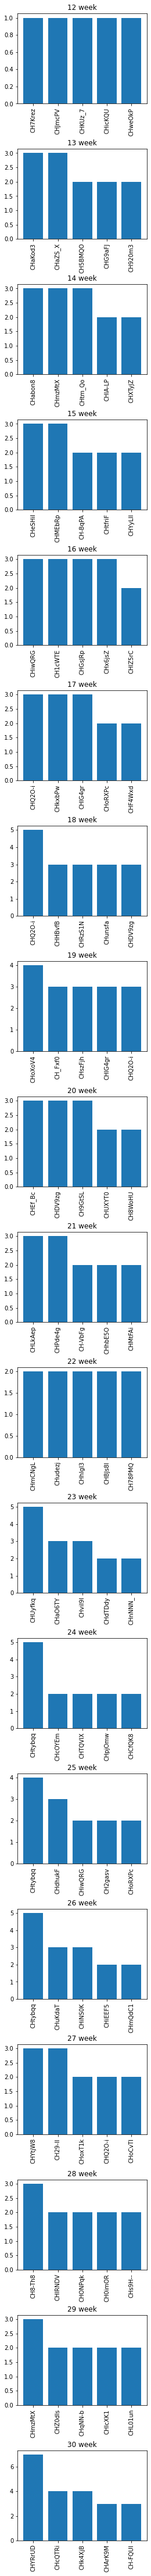

In [138]:
d = df.groupby(['on_trending_date_w', 'channel_id']).count()['video_id']

fig, axes = plt.subplots(len(weeks), 1, figsize=(4, 80))
plt.subplots_adjust(hspace=0.5)

for i, week in enumerate(weeks):
    temp = d[week].sort_values(ascending=False)[:5]
    axes[i].bar(temp.index, temp)
    axes[i].tick_params(axis='x', rotation=90)
    axes[i].set_title(f'{week} week', fontsize=12)


# Q2

각각의 비디오는 시청자의 호응도(engagement)를 판단할수 있는 객관적인 지표들이
있음

ex) views, likes, dislikes, comments,...

비디오를 인기 동영상 기준에 부합하도록 분류할 수 있는 새로운 지표를 개발하고 이 지표를 사용하여 engagement 와 어떤 상관관계가 있는지 설명하시오.

## 과제 이해

인기 동영상이라고 할 수 있을만한 해당 동영상의 특징은 무엇인가?

-> 짧은 시간동안 높은 조회수를 기록한 영상

-> 제공받은 데이터셋이 모두 인기동영상이니, 본 데이터셋에서 인기 척도의 하한선을 찾으면 된다.

-> 하한선 기준을 넘기면 인기동영상이라고 할 수 있기 때문이다.


## 조회수가 높아야한다.

In [27]:
min(df.on_views)

0

인기 탭에 올라갈 시의 조회수가 0인 데이터는 삭제한다

In [28]:
df = df[df['on_views'] != 0]

In [29]:
df['on_views'].describe()

count    2.643000e+03
mean     9.538427e+05
std      3.200926e+06
min      5.329700e+04
25%      2.353890e+05
50%      4.282010e+05
75%      8.274720e+05
max      9.727667e+07
Name: on_views, dtype: float64

Insight : 인기탭에 올라가려면 최소 5만3천 뷰 이상이어야한다.

9000만 뷰라는 값은 분석에 도움이 별로 안되므로 따로 봐야한다.

In [30]:
print(sum(df['on_views'] > 10000000))  # 1000만
print(sum(df['on_views'] > 10000000) / len(df))  # 1000만

22
0.00832387438516837


1000만 뷰 이상인 영상은 22개이며, 1%도 차지하지 않음.

In [31]:
df_under10m = df[df['on_views'] <= 10000000]  # 1000만뷰 이하인 영상들만 추림

In [32]:
df_under10m['on_views'].describe()

count    2.621000e+03
mean     7.305724e+05
std      9.971705e+05
min      5.329700e+04
25%      2.342740e+05
50%      4.237530e+05
75%      8.066980e+05
max      9.706443e+06
Name: on_views, dtype: float64

Text(0.5, 0.98, 'on views')

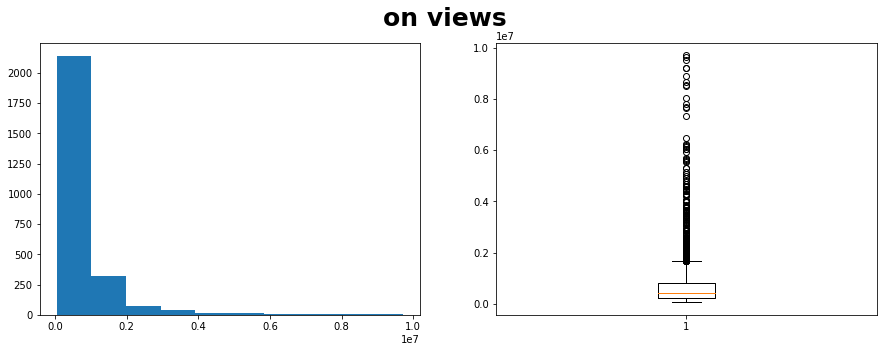

In [94]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].hist(df_under10m['on_views'])
axes[1].boxplot(df_under10m['on_views'])

fig.suptitle('on views',fontweight ="bold", fontsize=25)

대부분 200만 뷰 이하에 속한다.

Text(0.5, 0.98, 'on views')

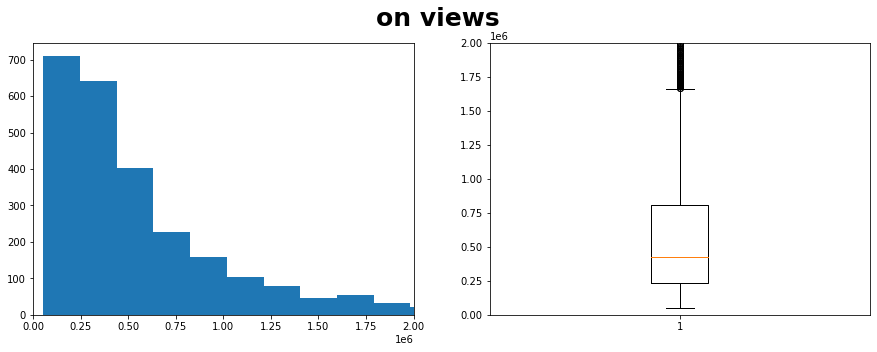

In [105]:
# on_views을 200만뷰까지만 봤을 때

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].hist(df_under10m['on_views'], bins=50)
axes[0].set_xlim([0, 2000000])  

axes[1].boxplot(df_under10m['on_views'])
axes[1].set_ylim([0, 2000000])  

fig.suptitle('on views',fontweight ="bold", fontsize=25)

## 업로드된 후 단기간 내에 조회 수가 상승해야한다.

In [ ]:
df_under10m.dtypes

In [ ]:
df_under10m['published_date'] = df_under10m['published_date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [60]:
df_under10m['upload_to_popular'] = df_under10m['on_trending_date_dt'] - df_under10m['published_date']
df_under10m['upload_to_popular'] = df_under10m['upload_to_popular'].map(lambda x: x.days)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [61]:
df_under10m['upload_to_popular'].describe()

count    2621.000000
mean        2.065242
std         0.491082
min         1.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         6.000000
Name: upload_to_popular, dtype: float64

Insight : 하루만에 인기 탭에 올라간 영상도 있고, 6일 후에 인기 탭 올라간 영상도 있다. 평균적으로 2일 후에 인기탭에 올라간다.

In [53]:
df_under10m['views_on_utp'] = df_under10m['on_views'] / df_under10m['upload_to_popular']  # 인기탭에 올라갈 때 조회수 / 업로드에서 인기탭에 올라갈 때까지 걸린 일 수

In [54]:
df_under10m['views_on_utp'].describe()

count    2.643000e+03
mean     5.168370e+05
std      2.530885e+06
min      1.841733e+04
25%      1.158440e+05
50%      2.141605e+05
75%      4.213178e+05
max      9.727667e+07
Name: views_on_utp, dtype: float64

Text(0, 0.5, 'count')

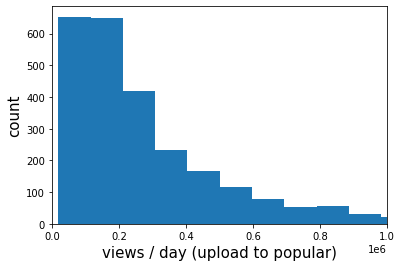

In [98]:
plt.hist(df_under10m['views_on_utp'], bins=100)
plt.xlim(0, 1000000)
plt.xlabel('views / day (upload to popular)', fontsize=15)
plt.ylabel('count', fontsize=15)

Insight : 업로드 날짜부터 인기탭에 올라간 날짜 동안의 조회수 상승률

(min)최소한, 하루에 18,000뷰는 받아야한다.

(mean)평균적으로는, 하루에 37만뷰는 받아야한다.

(median)그런데 최솟값과 최댓값의 차이가 너무 크기때문에 median값으로 보면, 보통 하루에 21만 뷰는 받아야한다.

In [62]:
df['off_trending_date_dt'] = df['off_trending_date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
df['off_trending_date_m'] = df['off_trending_date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d').month)
df['off_trending_date_w'] = df['off_trending_date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d').isocalendar()[1])

In [63]:
df['howmanydays'] = df['off_trending_date_dt'] - df['on_trending_date_dt']
df['howmanydays'] = df['howmanydays'].map(lambda x: x.days)

In [64]:
df['howmanydays'].describe()

count    2643.000000
mean        1.329928
std         1.169946
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         7.000000
Name: howmanydays, dtype: float64

(array([739., 877., 603.,   0., 292., 108.,   0.,  21.,   2.,   1.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <a list of 10 Patch objects>)

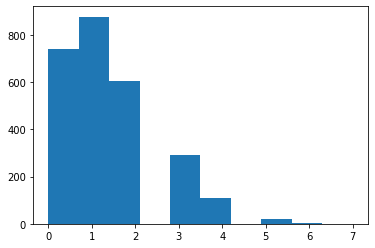

In [70]:
plt.hist(df['howmanydays'])

Insight : 데이터셋 자체가 인기동영상이므로, 얼마나 오래 인기탭에 머물렀는가로 인기동영상임을 판단하는 것은 맞지 않음

(min) 당일날 내려온 동영상도 있다.

(mean) 평균적으로 약 1.3일동안 인기 탭에 올라가있다.

## Like, Dislike

(array([2.609e+03, 1.700e+01, 7.000e+00, 2.000e+00, 4.000e+00, 2.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([      0. ,  809717.3, 1619434.6, 2429151.9, 3238869.2, 4048586.5,
        4858303.8, 5668021.1, 6477738.4, 7287455.7, 8097173. ]),
 <a list of 10 Patch objects>)

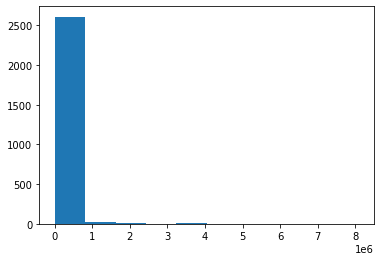

In [72]:
plt.hist(df.on_likes)

In [73]:
df.on_likes.describe()

count    2.643000e+03
mean     5.467881e+04
std      3.239933e+05
min      0.000000e+00
25%      4.210000e+03
50%      7.853000e+03
75%      1.689200e+04
max      8.097173e+06
Name: on_likes, dtype: float64

좋아요 수가 0인 데이터는 제거하고 봐야한다.

In [76]:
df = df[df['on_likes'] > 0]

In [77]:
df.on_likes.describe()

count    2.622000e+03
mean     5.511674e+04
std      3.252515e+05
min      4.230000e+02
25%      4.267750e+03
50%      7.900500e+03
75%      1.701400e+04
max      8.097173e+06
Name: on_likes, dtype: float64

인기탭에 올라갈 때, 최소의 좋아요 수는 423개(min), 최대 좋아요 수는 800만개(max)이다. 편차가 크기 때문에 median값으로 보자면 일반적으로 약 8000개의 좋아요를 받았다.

(0.0, 5000000.0)

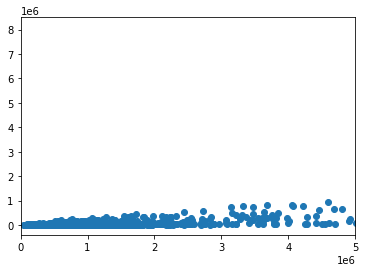

In [89]:
plt.scatter(df['on_views'], df['on_likes'])
plt.xlim((0, 5000000))  # 500만뷰

조회수와 좋아요 수는 큰 상관관계가 없다.

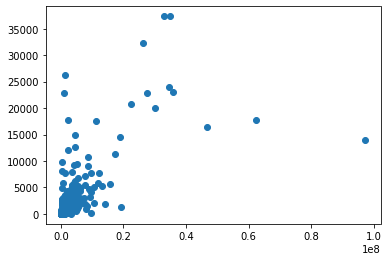

In [90]:
plt.scatter(df['on_views'], df['on_dislikes'])

조회수와 싫어요 수는 어느 정도의 상관관계를 갖고 있다.

그렇다면, 싫어요를 쓰지 않고 조회수 만으로도 인기동영상 판별이 가능하다.

## 결론

1. 인기탭에 올라온 영상 중 조회수가 가장 적은 영상은 5만 3천뷰

2. 업로드 날짜부터 인기탭에 올라간 날짜까지 하루당 받은 조회수가 가장 적은 경우는 18000뷰

3. 인기탭에 올라간 날짜는 모두 6일 이내에 판별한다.

4. like와 dislike는 조회수와 큰 관계가 없다



따라서, 어떤 동영상이 인기탭에 올라갈 것인지 판별하는 조건은 다음과 같다


- 조건1. 조회수 > 53000
- 조건2. 오늘 날짜 - 업로드날짜 =< 6
- 조건3. 오늘까지 하루당 받은 조회수가 18000 이상$$